In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
X_1=iris.data[:100,[2,3]]
y_1=iris.target[:100]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_1_std = scaler.transform(X_1)

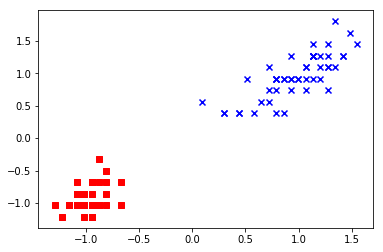

In [9]:
plt.scatter(X_1_std[:50, [0]], X_1_std[:50, [1]], color='red', marker='s')
plt.scatter(X_1_std[50:100, [0]], X_1_std[50:100, [1]], color='blue', marker='x')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_std, y_1, test_size=0.3, random_state=0)

In [11]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_1_train,y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()


In [13]:
from sklearn.datasets import load_iris
iris=load_iris()
X_2=iris.data[50:150,[2,3]]
y_2=iris.target[50:150]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler_2=StandardScaler()
scaler_2.fit(X_2)
X_2_std=scaler_2.transform(X_2)

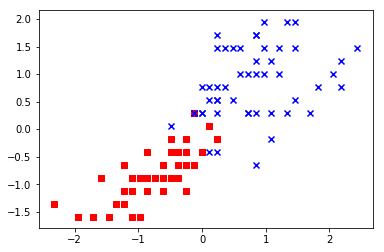

In [15]:
plt.scatter(X_2_std[:50, [0]], X_2_std[:50, [1]], color='red', marker='s')
plt.scatter(X_2_std[50:100, [0]], X_2_std[50:100, [1]], color='blue', marker='x')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_std, y_2, test_size=0.3, random_state=0)


In [17]:
from sklearn.svm import SVC
svc_slack=SVC(kernel='linear',C=1.0)
svc_slack.fit(X_2_train,y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

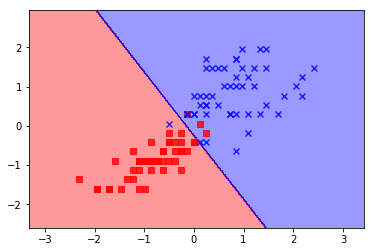

In [18]:
plot_decision_regions(X_2_std,y_2,svc_slack)

In [19]:
svc_slack.score(X_2_test,y_2_test)

0.9666666666666667

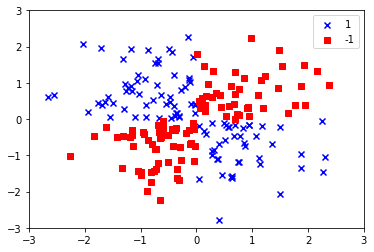

In [20]:
np.random.seed(0)
X_xor=np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)

In [23]:
learn_svm=SVC(kernel='linear',C=0.1)
learn_svm.fit(X_xor_train,y_xor_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

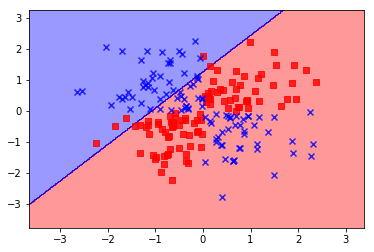

In [26]:
plot_decision_regions(X_xor, y_xor, classifier=learn_svm)

In [27]:
learn_svm.score(X_xor_test,y_xor_test)

0.6166666666666667

In [28]:
rbf_svm=SVC(kernel='rbf',gamma=0.1,C=10)
rbf_svm.fit(X_xor_train,y_xor_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

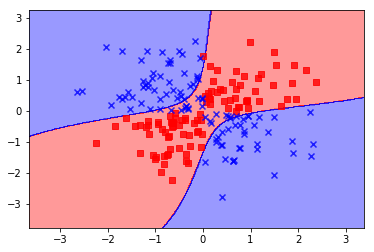

In [29]:
plot_decision_regions(X_xor,y_xor,classifier=rbf_svm)

In [ ]:
rbf_svm.score(X_xor_test)